In [1]:
# Import packages
# Pandas documentation can be found here: https://pandas.pydata.org/docs/getting_started/index.html
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initalize DataFrame

h_df = pd.read_excel('BoutinResults.xlsx',sheet_name='hygienic_overexpressed')  #import overexpressed genes in hygienic bees
h_df.insert(1, "Hygiene", "H") #Hygiene Status = H (hygienic) or NH (non-hygienic)
h_df.insert(7,"FC",0) #Add a column for calculating expression fold change
#Calculate FC overexpression
for k in range(len(h_df)):
    if h_df.loc[k,'Non-hygienic FPKM'] == 0.000000:
        h_df.loc[k, 'FC'] = 0
    else:
        FC = h_df.loc[k,'Hygienic FPKM'] / h_df.loc[k,'Non-hygienic FPKM']
        h_df.loc[k,'FC'] = FC
h_df['FC'] = h_df['FC'].astype(float)
#display(h_df)

nh_df = pd.read_excel('BoutinResults.xlsx',sheet_name='nonhygienic_overexpressed')  #import overexpressed genes in nonhygienic bees
nh_df.insert(1, "Hygiene", "NH") #Hygiene Status = H (hygienic) or NH (non-hygienic)
#Calculate FC overexpression
for k in range(len(nh_df)):
    if nh_df.loc[k,'Hygienic FPKM'] == 0.000000:
        nh_df.loc[k, 'FC'] = 0
    else:
        FC = nh_df.loc[k,'Non-hygienic FPKM'] / nh_df.loc[k,'Hygienic FPKM']
        nh_df.loc[k,'FC'] = FC
nh_df['FC'] = nh_df['FC'].astype(float)
#display(nh_df)

overex_df = pd.concat([h_df,nh_df]) #bring all overexpressed genes together in one df
display(overex_df)

,Gene,Hygiene,Chromosome,Hygienic FPKM,Non-hygienic FPKM,q_value,Gene product,FC
0,Cac,H,Chr3,7.798840,5.121430,0.043519,cacophony,1.522786
1,CPR5,H,Chr16,72.640000,43.537500,0.043519,cuticular protein 5,1.668447
2,CYP6AS1,H,Chr13,2.044040,0.281032,0.007550,cytochrome P450 6AS1,7.273335
3,Gat-a,H,Chr1,11.793000,6.293340,0.007550,GABA neurotransmitter transporter-1A,1.873886
4,LOC100576698,H,Unplaced scaffold,21.775700,11.073200,0.007550,hypothetical LOC100576698,1.966523
...,...,...,...,...,...,...,...,...
63,SP23,NH,Chr4,4.281020,7.147450,0.007550,serine protease 23,1.669567
64,Sur,NH,Chr3,0.985398,1.649450,0.018986,sulfonylurea receptor,1.673892
65,TpnCIIIa,NH,Chr12,46.841200,79.459000,0.007550,troponin C type IIIa,1.696349
66,TpnI,NH,Chr2,31.118200,54.975100,0.007550,troponin I,1.766654


In [5]:
# export the data in the hygiene dataset
overex_df.to_csv("../data/hygiene_genes.csv")

<Figure size 1920x1440 with 0 Axes>

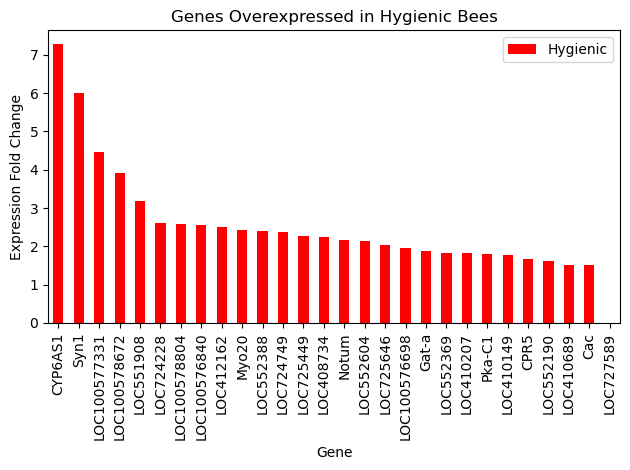

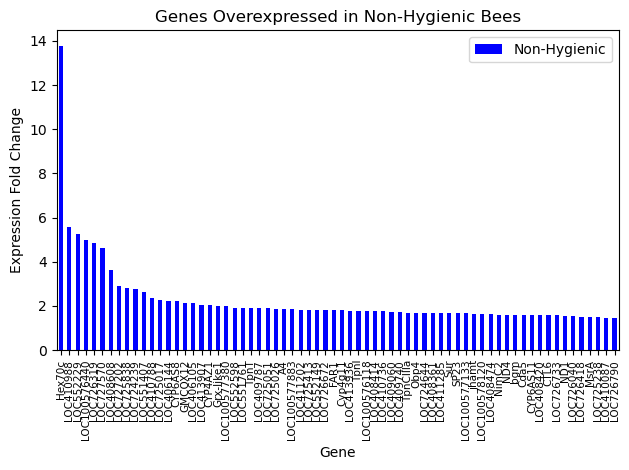

In [3]:
#Fold changes

plt.figure(1, dpi=300)
h_df = h_df.sort_values(by=['FC'],ascending=False) #sort by highest FC
h_df.plot.bar(x='Gene', y='FC',color='red',label='Hygienic')
plt.ylabel('Expression Fold Change')
plt.title('Genes Overexpressed in Hygienic Bees')
plt.tight_layout()
plt.savefig('OverExHyg.png') #uncomment if you actually want to save figure

plt.figure(2,figsize=(15,5),dpi=300)
nh_df = nh_df.sort_values(by=['FC'],ascending=False) #sort by highest FC
nh_df.plot.bar(x='Gene', y='FC',color='blue',label='Non-Hygienic')
plt.ylabel('Expression Fold Change')
plt.title('Genes Overexpressed in Non-Hygienic Bees')
plt.tick_params(axis='x', which='major', labelsize=7.5)
plt.tight_layout()
plt.savefig('OverExNonHyg.png') #uncomment if you actually want to save figure


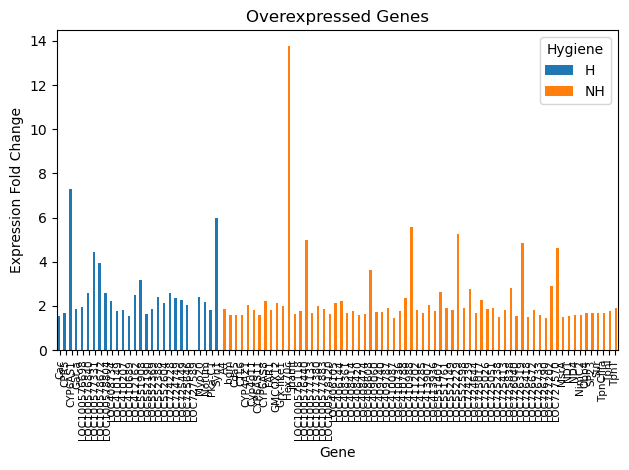

In [4]:
#Bring it all into 1 plot
plt.figure(3)
plt.title('Overexpressed Genes')
sns.barplot(data=overex_df, x='Gene', y='FC', hue='Hygiene',saturation=1)
plt.ylabel('Expression Fold Change')
plt.tick_params(axis='x', labelrotation=90, labelsize=7.5)
plt.tight_layout()
plt.savefig('OverExAll.png') #uncomment if you actually want to save figure